#Encoding-Decoding

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
pip install emoji

     |████████████████████████████████| 184 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=51495c54fbc8583eaa6e4c82f4b424acc6020e01dbeabe54f0994c03a59aa6f8
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [ ]:
import emoji

print(emoji.emojize('I am fine :thumbs_up:'))

I am fine 👍


In [ ]:
print(emoji.emojize('I am fine :collision:'))

I am fine 💥


In [ ]:
print(emoji.emojize('I am fine :zzz:'))

I am fine 💤


In [ ]:
print(emoji.emojize('I am fine :yum:'))

I am fine :yum:


In [ ]:
tf.constant(u"Thanks 😊")

<tf.Tensor: shape=(), dtype=string, numpy=b'Thanks \xf0\x9f\x98\x8a'>

In [ ]:
# Unicode string, represented as a UTF-8 encoded string scalar.
text_utf8 = tf.constant(u"语言处理")
text_utf8

<tf.Tensor: shape=(), dtype=string, numpy=b'\xe8\xaf\xad\xe8\xa8\x80\xe5\xa4\x84\xe7\x90\x86'>

In [ ]:
# Unicode string, represented as a UTF-16-BE encoded string scalar.
text_utf16be = tf.constant(u"语言处理".encode("UTF-16-BE"))
text_utf16be

<tf.Tensor: shape=(), dtype=string, numpy=b'\x8b\xed\x8a\x00Y\x04t\x06'>

In [ ]:
# Unicode string, represented as a vector of Unicode code points.
text_chars = tf.constant([ord(char) for char in u"语言处理"])
text_chars

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([35821, 35328, 22788, 29702], dtype=int32)>

TensorFlow provides operations to convert between these different representations:



*   tf.strings.unicode_decode: Converts an encoded string scalar to a vector of code points.
*   tf.strings.unicode_encode: Converts a vector of code points to an encoded string scalar.
*   tf.strings.unicode_transcode: Converts an encoded string scalar to a different encoding.








In [ ]:
tf.strings.unicode_decode(text_utf8,
                          input_encoding='UTF-8')

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([35821, 35328, 22788, 29702], dtype=int32)>

In [ ]:
tf.strings.unicode_encode(text_chars,
                          output_encoding='UTF-8')

<tf.Tensor: shape=(), dtype=string, numpy=b'\xe8\xaf\xad\xe8\xa8\x80\xe5\xa4\x84\xe7\x90\x86'>

In [ ]:
tf.strings.unicode_transcode(text_utf8,
                             input_encoding='UTF8',
                             output_encoding='UTF-16-BE')

<tf.Tensor: shape=(), dtype=string, numpy=b'\x8b\xed\x8a\x00Y\x04t\x06'>

In [ ]:
# to_list

# A batch of Unicode strings, each represented as a UTF8-encoded string.
batch_utf8 = [s.encode('UTF-8') for s in
              [u'hÃllo', u'What is the weather tomorrow', u'Göödnight', u'😊']]

batch_chars_ragged = tf.strings.unicode_decode(batch_utf8,
                                               input_encoding='UTF-8')
for sentence_chars in batch_chars_ragged.to_list():
  print(sentence_chars)

[104, 195, 108, 108, 111]
[87, 104, 97, 116, 32, 105, 115, 32, 116, 104, 101, 32, 119, 101, 97, 116, 104, 101, 114, 32, 116, 111, 109, 111, 114, 114, 111, 119]
[71, 246, 246, 100, 110, 105, 103, 104, 116]
[128522]


In [ ]:
# to_tensor

batch_chars_padded = batch_chars_ragged.to_tensor(default_value=-1)
print(batch_chars_padded.numpy())

[[   104    195    108    108    111     -1     -1     -1     -1     -1
      -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
      -1     -1     -1     -1     -1     -1     -1     -1]
 [    87    104     97    116     32    105    115     32    116    104
     101     32    119    101     97    116    104    101    114     32
     116    111    109    111    114    114    111    119]
 [    71    246    246    100    110    105    103    104    116     -1
      -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
      -1     -1     -1     -1     -1     -1     -1     -1]
 [128522     -1     -1     -1     -1     -1     -1     -1     -1     -1
      -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
      -1     -1     -1     -1     -1     -1     -1     -1]]


In [ ]:
batch_chars_sparse = batch_chars_ragged.to_sparse()
print(batch_chars_sparse)

SparseTensor(indices=tf.Tensor(
[[ 0  0]
 [ 0  1]
 [ 0  2]
 [ 0  3]
 [ 0  4]
 [ 1  0]
 [ 1  1]
 [ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 1 11]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 15]
 [ 1 16]
 [ 1 17]
 [ 1 18]
 [ 1 19]
 [ 1 20]
 [ 1 21]
 [ 1 22]
 [ 1 23]
 [ 1 24]
 [ 1 25]
 [ 1 26]
 [ 1 27]
 [ 2  0]
 [ 2  1]
 [ 2  2]
 [ 2  3]
 [ 2  4]
 [ 2  5]
 [ 2  6]
 [ 2  7]
 [ 2  8]
 [ 3  0]], shape=(43, 2), dtype=int64), values=tf.Tensor(
[   104    195    108    108    111     87    104     97    116     32
    105    115     32    116    104    101     32    119    101     97
    116    104    101    114     32    116    111    109    111    114
    114    111    119     71    246    246    100    110    105    103
    104    116 128522], shape=(43,), dtype=int32), dense_shape=tf.Tensor([ 4 28], shape=(2,), dtype=int64))


In [ ]:
nrows, ncols = batch_chars_sparse.dense_shape.numpy()
print(nrows,ncols)

4 28


In [ ]:
elements = [['_' for i in range(ncols)] for j in range(nrows)]
elements[0]

['_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_']

In [ ]:
print(list(zip(batch_chars_sparse.indices.numpy(), batch_chars_sparse.values.numpy())))


[(array([0, 0]), 104), (array([0, 1]), 195), (array([0, 2]), 108), (array([0, 3]), 108), (array([0, 4]), 111), (array([1, 0]), 87), (array([1, 1]), 104), (array([1, 2]), 97), (array([1, 3]), 116), (array([1, 4]), 32), (array([1, 5]), 105), (array([1, 6]), 115), (array([1, 7]), 32), (array([1, 8]), 116), (array([1, 9]), 104), (array([ 1, 10]), 101), (array([ 1, 11]), 32), (array([ 1, 12]), 119), (array([ 1, 13]), 101), (array([ 1, 14]), 97), (array([ 1, 15]), 116), (array([ 1, 16]), 104), (array([ 1, 17]), 101), (array([ 1, 18]), 114), (array([ 1, 19]), 32), (array([ 1, 20]), 116), (array([ 1, 21]), 111), (array([ 1, 22]), 109), (array([ 1, 23]), 111), (array([ 1, 24]), 114), (array([ 1, 25]), 114), (array([ 1, 26]), 111), (array([ 1, 27]), 119), (array([2, 0]), 71), (array([2, 1]), 246), (array([2, 2]), 246), (array([2, 3]), 100), (array([2, 4]), 110), (array([2, 5]), 105), (array([2, 6]), 103), (array([2, 7]), 104), (array([2, 8]), 116), (array([3, 0]), 128522)]


In [ ]:
for (row, col), value in zip(batch_chars_sparse.indices.numpy(), batch_chars_sparse.values.numpy()):
  elements[row][col] = str(value)

In [ ]:
elements

[['104',
  '195',
  '108',
  '108',
  '111',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_'],
 ['87',
  '104',
  '97',
  '116',
  '32',
  '105',
  '115',
  '32',
  '116',
  '104',
  '101',
  '32',
  '119',
  '101',
  '97',
  '116',
  '104',
  '101',
  '114',
  '32',
  '116',
  '111',
  '109',
  '111',
  '114',
  '114',
  '111',
  '119'],
 ['71',
  '246',
  '246',
  '100',
  '110',
  '105',
  '103',
  '104',
  '116',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_'],
 ['128522',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_',
  '_']]

In [ ]:
value_length=[]
for row in elements:
  for values in row:
    value_length.append(len(values))

In [ ]:
value_length

[3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
max_width = max(value_length)
print('[%s]' % '\n '.join(
    '[%s]' % ', '.join(value.rjust(max_width) for value in row)
    for row in elements))

[[   104,    195,    108,    108,    111,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _]
 [    87,    104,     97,    116,     32,    105,    115,     32,    116,    104,    101,     32,    119,    101,     97,    116,    104,    101,    114,     32,    116,    111,    109,    111,    114,    114,    111,    119]
 [    71,    246,    246,    100,    110,    105,    103,    104,    116,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _]
 [128522,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _,      _]]


# Request link library

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
response = requests.get('https://en.wikipedia.org/wiki/Main_Page')
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

In [ ]:
response.content

In [ ]:
response.text

#Basics of NLP

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
string = 'Because it can be edited by anyone at any time, any information it contains at a particular time could be vandalism, a work in progress, or just plain wrong. Edit wars and bias can also occur on many Wikipedia articles'

In [ ]:
doc = nlp(string)

In [ ]:
for token in doc:
  print(token.text,end=' | ')


print(type(token))

Because | it | can | be | edited | by | anyone | at | any | time | , | any | information | it | contains | at | a | particular | time | could | be | vandalism | , | a | work | in | progress | , | or | just | plain | wrong | . | Edit | wars | and | bias | can | also | occur | on | many | Wikipedia | articles | <class 'spacy.tokens.token.Token'>


In [ ]:
string1 = 'Morningside Park is a 30-acre (12-hectare) public park in Upper Manhattan, New York City. The area, originally known as "Muscota" by the Lenape Native Americans, features a cliff that separates Morningside Heights (to the west) from Harlem. '

In [ ]:
doc1 = nlp(string1) 

In [ ]:
for token in doc1:
  print(token, end=' | ')

Morningside | Park | is | a | 30-acre | ( | 12-hectare | ) | public | park | in | Upper | Manhattan | , | New | York | City | . | The | area | , | originally | known | as | " | Muscota | " | by | the | Lenape | Native | Americans | , | features | a | cliff | that | separates | Morningside | Heights | ( | to | the | west | ) | from | Harlem | . | 

In [ ]:
string2 = 'This activity helps companies raise necessary capital from investors. It essentially means that a company divides itself into a number of shares (say, 20 million shares) and sells a part of those shares (say, 5 million shares) to common public at a price (say, $10 per share).'

In [ ]:
doc2 = nlp(string2)

In [ ]:
for token in doc2:
  print(token,end=' | ')

This | activity | helps | companies | raise | necessary | capital | from | investors | . | It | essentially | means | that | a | company | divides | itself | into | a | number | of | shares | ( | say | , | 20 | million | shares | ) | and | sells | a | part | of | those | shares | ( | say | , | 5 | million | shares | ) | to | common | public | at | a | price | ( | say | , | $ | 10 | per | share | ) | . | 

In [ ]:
for token in doc2:
  print(token.text,'----',token.lemma_)

This ---- this
activity ---- activity
helps ---- help
companies ---- company
raise ---- raise
necessary ---- necessary
capital ---- capital
from ---- from
investors ---- investor
. ---- .
It ---- -PRON-
essentially ---- essentially
means ---- mean
that ---- that
a ---- a
company ---- company
divides ---- divide
itself ---- -PRON-
into ---- into
a ---- a
number ---- number
of ---- of
shares ---- share
( ---- (
say ---- say
, ---- ,
20 ---- 20
million ---- million
shares ---- share
) ---- )
and ---- and
sells ---- sell
a ---- a
part ---- part
of ---- of
those ---- those
shares ---- share
( ---- (
say ---- say
, ---- ,
5 ---- 5
million ---- million
shares ---- share
) ---- )
to ---- to
common ---- common
public ---- public
at ---- at
a ---- a
price ---- price
( ---- (
say ---- say
, ---- ,
$ ---- $
10 ---- 10
per ---- per
share ---- share
) ---- )
. ---- .


Parts of speech

In [ ]:
for i in range(len(doc2)):
  print(doc2[i].text,'---',doc2[i].pos_,'---',doc2[i].tag_,'---',spacy.explain(doc2[i].tag_))

This --- DET --- DT --- determiner
activity --- NOUN --- NN --- noun, singular or mass
helps --- VERB --- VBZ --- verb, 3rd person singular present
companies --- NOUN --- NNS --- noun, plural
raise --- VERB --- VB --- verb, base form
necessary --- ADJ --- JJ --- adjective
capital --- NOUN --- NN --- noun, singular or mass
from --- ADP --- IN --- conjunction, subordinating or preposition
investors --- NOUN --- NNS --- noun, plural
. --- PUNCT --- . --- punctuation mark, sentence closer
It --- PRON --- PRP --- pronoun, personal
essentially --- ADV --- RB --- adverb
means --- VERB --- VBZ --- verb, 3rd person singular present
that --- SCONJ --- IN --- conjunction, subordinating or preposition
a --- DET --- DT --- determiner
company --- NOUN --- NN --- noun, singular or mass
divides --- VERB --- VBZ --- verb, 3rd person singular present
itself --- PRON --- PRP --- pronoun, personal
into --- ADP --- IN --- conjunction, subordinating or preposition
a --- DET --- DT --- determiner
number --- 

In [ ]:
for i in range(len(doc2)):
  print(f' {doc2[i].text:{20}} {doc2[i].pos_:{20}} {doc2[i].tag_:{20}} {spacy.explain(doc2[i].tag_)}')

 This                 DET                  DT                   determiner
 activity             NOUN                 NN                   noun, singular or mass
 helps                VERB                 VBZ                  verb, 3rd person singular present
 companies            NOUN                 NNS                  noun, plural
 raise                VERB                 VB                   verb, base form
 necessary            ADJ                  JJ                   adjective
 capital              NOUN                 NN                   noun, singular or mass
 from                 ADP                  IN                   conjunction, subordinating or preposition
 investors            NOUN                 NNS                  noun, plural
 .                    PUNCT                .                    punctuation mark, sentence closer
 It                   PRON                 PRP                  pronoun, personal
 essentially          ADV                  RB              

**Stemming**

In [ ]:
import nltk

In [ ]:
#porter stemmer
from nltk.stem.porter import *

In [ ]:
p_stemmer = PorterStemmer()

In [ ]:
word = ['running','ran','run','easily','finally','early']

In [ ]:
for w in word:
  print(f' {w:{10}} {p_stemmer.stem(w)}')

 running    run
 ran        ran
 run        run
 easily     easili
 finally    final
 early      earli


In [ ]:
# Snowball stemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
s_stemmer = SnowballStemmer(language='english')

In [ ]:
for w in word:
  print(w ,'-------', s_stemmer.stem(w))

running ------- run
ran ------- ran
run ------- run
easily ------- easili
finally ------- final
early ------- earli


In [ ]:
!wget --no-check-certificate \    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P -O /tmp/sentiment.csv \    -O /tmp/sentiment.csv
import pandas as pd
df = pd.read_csv('/tmp/sentiment.csv')

--2021-09-02 10:16:01--  http://%20/
Resolving   ( )... failed: Name or service not known.
wget: unable to resolve host address ‘ ’
--2021-09-02 10:16:01--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 173.194.194.138, 173.194.194.102, 173.194.194.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.194.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u54h4o0e2mjeq4a0fc5lnspnrp92galn/1630577700000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2021-09-02 10:16:02--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u54h4o0e2mjeq4a0fc5lnspnrp92galn/1630577700000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)...

In [ ]:
df.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [ ]:
X = df['text']
y = df['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.20)

Since this is text data, there are several things you have to to clean it. This includes:


* Converting all sentences to lowercase

* Removing all quotation marks
* Representing all words in some numerical form


* Removing special characters such as @ and %

All the above can be achieved in TensorFlow using **Tokenizer**. The class expects a couple of parameters:


*  num_words: the maximum number of words you want to be included in the word index

*  oov_token: the token to be used to represent words that won't be found in the word dictionary. This usually happens when processing the training data. The number 1 is usually used to represent the "out of vocabulary" token ("oov" token)

The **fit_on_texts** function is used to fit the Tokenizer on the training set once it has been instantiated with the preferred parameters.

In [ ]:
from keras.preprocessing.text import Tokenizer
vocab_size = 1000
oov_token = '<OOV>'
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
#The word_index can be used to show the mapping of the words to numbers.
wrod_counts = tokenizer.word_counts
wrod_index = tokenizer.word_index
word_docs = tokenizer.word_docs
print(wrod_counts)

OrderedDict([('the', 882), ('only', 41), ('good', 141), ('thing', 20), ('was', 313), ('that', 123), ('it', 348), ('fits', 8), ('comfortably', 2), ('on', 112), ('small', 10), ('ears', 5), ('yet', 6), ('plantronincs', 1), ('continues', 1), ('to', 330), ('use', 34), ('same', 14), ('flawed', 1), ('charger', 16), ('design', 10), ('i', 515), ('have', 110), ('been', 32), ('here', 50), ('several', 5), ('times', 14), ('in', 147), ('past', 1), ('and', 564), ('experience', 18), ('has', 38), ('always', 14), ('great', 134), ('croutons', 1), ('also', 42), ('taste', 12), ('homemade', 3), ('which', 33), ('is', 330), ('an', 41), ('extra', 6), ('plus', 2), ('took', 10), ('hour', 6), ('get', 36), ('our', 33), ('food', 104), ('4', 6), ('tables', 4), ('restaurant', 18), ('my', 174), ('luke', 1), ('warm', 7), ('sever', 1), ('running', 4), ('around', 11), ('like', 63), ('he', 15), ('totally', 3), ('overwhelmed', 2), ('if', 50), ('she', 9), ('had', 95), ('not', 183), ('rolled', 1), ('eyes', 1), ('we', 73), ('

In [ ]:
list(wrod_index)[0:15]

['<OOV>',
 'the',
 'and',
 'i',
 'a',
 'it',
 'to',
 'is',
 'was',
 'this',
 'for',
 'of',
 'not',
 'my',
 'in']

In [ ]:
list(word_docs)[0:15]

['fits',
 'only',
 'the',
 'ears',
 'good',
 'it',
 'thing',
 'comfortably',
 'on',
 'was',
 'that',
 'small',
 'yet',
 'same',
 'continues']

The next step is to represent each sentiment as a sequence of numbers. This can be done using the texts_to_sequences function.

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
X_train_sequences[0:5]

[[2, 58, 17, 128, 9, 21, 6, 281, 836, 22, 233, 431],
 [370, 1, 1, 7, 74, 2, 176, 1, 157, 234],
 [4, 23, 81, 44, 432, 177, 15, 2, 1, 3, 2, 140, 65, 178, 81, 20],
 [2, 1, 57, 198, 626, 76, 8, 59, 371, 837],
 [235,
  59,
  372,
  7,
  69,
  77,
  25,
  58,
  373,
  512,
  15,
  141,
  14,
  25,
  9,
  1,
  322,
  77,
  1,
  9,
  513,
  219,
  37,
  167,
  9,
  627,
  838]]

In [ ]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)

At the moment, the sequences have different lengths. Usually, you will pass a sequence of the same length to a machine learning model. You therefore have to ensure that all sequences are of the same length. This is done by padding the sequences. Longer sequences will be truncated while shorter ones will be padded with zeros. You will therefore have to declare the truncation and padding type.

In [ ]:
max_length = 100
padding_type='post'
truncation_type='post'
from keras.preprocessing.sequence import pad_sequences

X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=truncation_type)

In [ ]:
X_test_padded[0:5]

array([[  4, 243, 420,  24, 134, 121,   4,   9,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2, 185, 455, 333, 356,   1,  15,  13,   5,  17, 160,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Project 

In [1]:
import nltk
from nltk.corpus import stopwords

In [2]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGraph',
 'Depen

In [3]:
# parts of speec = pos_tag
# tokenization = tokenize

In [4]:
nltk.download('stopwords')
stopwords.words('english')[0:15]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [7]:
stopwords.words('english')[0:15:2]

['i', 'my', 'we', 'ours', 'you', "you've", "you'd", 'yours']

In [8]:
data = open('SMSSpamCollection.tsv').read()

In [9]:
data[0:500]

#here \t divides the label and text
#\n is used for change the line 
# so we will replace the \t to \n becuase of changing the line and splitting by (\n) so we can extract label and text separately 

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [10]:
parsedata = data.replace('\t','\n').split('\n')

In [11]:
parsedata[0:10]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 "Nah I don't think he goes to usf, he lives around here though",
 'ham',
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'ham',
 'I HAVE A DATE ON SUNDAY WITH WILL!!']

In [12]:
labellist = parsedata[0::2]

In [13]:
labellist[0:10]

['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam']

In [14]:
textlist = parsedata[1::2]

In [15]:
textlist[0:5]

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "Nah I don't think he goes to usf, he lives around here though",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'I HAVE A DATE ON SUNDAY WITH WILL!!']

In [16]:
import pandas as pd

df = pd.DataFrame({ 'label': labellist, 'text': textlist})

ValueError: ignored

In [17]:
print(len(labellist))
print(len(textlist))

5571
5570


In [21]:
print(labellist[-5:])

['ham', 'ham', 'ham', 'ham', '']


In [22]:
df = pd.DataFrame({ 'label': [labellist[:-1]], 'text':[textlist]})

In [23]:
df.head()

,label,text
0,"[ham, spam, ham, ham, ham, ham, spam, spam, ha...",[I've been searching for the right words to th...


In [24]:
df = pd.DataFrame({'label': labellist[:-1], 'text': textlist})
# [:-1] it will give you all values except last one
# that means all values upto -1(means last value)

In [25]:
df.head()

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [28]:
dataset = pd.read_csv('SMSSpamCollection.tsv',header=None,sep='\t')
# here we have use header = none because there is no column name otherwise it will give 1 line as column name
#seperator used \t to splits into two column
# by default it will automatically split data by \n

In [29]:
dataset.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [30]:
dataset.columns= ['label','text']

In [31]:
dataset.head()

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [33]:
# dataset['label'] = dataset[0]
# dataset['text'] = dataset[1]

In [35]:
dataset.head()

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [36]:
print('input data has rows {} and columns {} '.format(len(dataset),len(dataset.columns)))

input data has rows 5568 and columns 2 


In [ ]:

ham_data = dataset.loc[dataset['label']=='ham'] 
spam_data = dataset.loc[dataset['label']=='spam'] 

In [ ]:
len(ham_data),len(spam_data)

(4822, 746)

<BarContainer object of 2 artists>

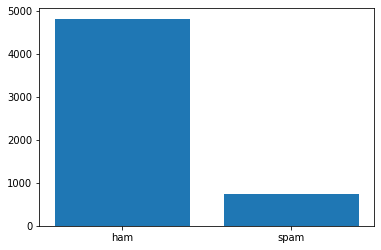

In [ ]:
import matplotlib.pyplot as plt

plt.bar(['ham','spam'],[len(ham_data),len(spam_data)])

In [ ]:
dataset.isnull().sum()

label    0
text     0
dtype: int64

**Regular Expression**

In [ ]:
import re

re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up     string to test 2    different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods'

In [ ]:
re.split('\s',re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re_test.split()

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.split('\s',re_test_messy)

['This',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

In [ ]:
re.split('\s+',re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re_test_messy.split()

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re_test_messy1.split([' ','-','"','~','>','*','/'])

TypeError: ignored

In [ ]:
re.split('\W',re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 '',
 '',
 '',
 'test',
 '',
 '',
 '',
 '2',
 '',
 '',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

In [ ]:
re.split('\W+',re_test_messy1)
# W will remove all non words character from the string and we are using W+ because there are more special character

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.findall('\S+',re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.findall('\S+',re_test_messy1)
# here we are using findall and S+ to search for all non words element then removing it

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

In [ ]:
re.findall('\w+',re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [ ]:
import re

re.findall('[a-z]+',pep8_test)
# It will only search lower character between a to z

['try', 'to', 'follow', 'guidelines']

In [ ]:
re.findall('[A-Z]+',pep8_test)

['I', 'PEP']

In [ ]:
re.findall('[A-Z]+[0-9]+',pep8_test)

['PEP8']

In [ ]:
re.sub('[A-Z]+[0-9]+','PEP8 python guidlines ',pep8_test)

'I try to follow PEP8 python guidlines  guidelines'

#removing punctuatuion

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth',100)

In [ ]:
df = pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
df.columns = ['labels','text']

In [ ]:
df.head()
# here because we set column width 100 its look like below 

,labels,text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
df_cleaned = pd.read_csv('SMSSpamCollection_cleaned.tsv',sep='\t')
df_cleaned.head()

FileNotFoundError: ignored

In [ ]:
import string
string.punctuation

In [ ]:
def remove_punct(text):
  text_non_punct = ''.join([char for char in text if char not in string.punctuation])
  return text_non_punct

In [ ]:
df['text_clean'] = df['text'].apply(lambda x: remove_punct(x))

In [ ]:
df.head()

#Tokenization

In [ ]:
import re

def tokenize(text):
  tokens = re.split('\W+',text) 
  return tokens

df['token'] = df['text_clean'].apply(lambda x : tokenize(x.lower()))
#after lower case we would apply tokenize function

# we convert into lower canse because all the words then will be in same lower python will understand easily

In [ ]:
df.head()

In [ ]:
import nltk

stopwards = nltk.corpus.stopwords.words('english')

In [ ]:
stopwards[0:5]

In [ ]:
def remove_stopwords(text):
  text = [char for char in text if char not in stopwards]
  return text

In [ ]:
df['text_new'] = df['token'].apply(lambda x: remove_stopwords(x))

In [ ]:
df.head()

,labels,text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#Stemming

In [ ]:
import nltk

ps = nltk.PorterStemmer()

In [ ]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [ ]:
print(ps.stem('growing'))
print(ps.stem('intializing'))
print(ps.stem('stemming'))
print(ps.stem('popularity'))

grow
intial
stem
popular


In [ ]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
df.columns = ['labels','text']
df.head()

,labels,text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
import nltk

stopwards = nltk.corpus.stopwords.words('english')

In [ ]:
def text_cleaned(text):
  text = ''.join([char for char in text if text not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [word for word in tokens if word not in stopwards]
  return text

In [ ]:
df['new_text'] = df['text'].apply(lambda x: text_cleaned(x))

In [ ]:
df.head()

,labels,text,new_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[I, searching, right, words, thank, breather, I, promise, wont, take, help, granted, fulfil, pro..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[Even, brother, like, speak, They, treat, like, aids, patent, ]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL, ]"


In [ ]:
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

df['stem_text'] = df['new_text'].apply(lambda x: stemming(x.lower()))

AttributeError: ignored

In [ ]:
df.head()

# Lemmatization

In [ ]:
import nltk

wn= nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
print(ps.stem('meanness'))
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))
#here Wordnet lemmtizing is pick word from dictionary. that enables us more convinent way to understand the word

mean
meanness
meaning


In [ ]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [ ]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


In [ ]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
df.columns = ['labels','text']
df.head()

,labels,text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk

stopwards = nltk.corpus.stopwords.words('english')

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re

In [ ]:
def lemmatized(text):
  text = ''.join([char for char in text if text not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [word for word in tokens if word not in stopwards]
  text = [wn.lemmatize(word) for word in text]
  return text

In [ ]:
df['lemm_text'] = df['text'].apply(lambda x: lemmatized(x.lower()))

In [ ]:
df.head(10)

#lemmatize is good for searching in books becuase it contains all the dictionary words

,labels,text,lemm_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promise, w..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent, ]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday, ]"
5,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
6,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170..."
7,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[mobile, 11, month, u, r, entitled, update, latest, colour, mobile, camera, free, call, mobile, ..."
8,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...","[gonna, home, soon, want, talk, stuff, anymore, tonight, k, cried, enough, today, ]"
9,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...","[six, chance, win, cash, 100, 20, 000, pound, txt, csh11, send, 87575, cost, 150p, day, 6days, 1..."


# Vectorizing

**Count vectorizer**

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth',100)

In [ ]:
df = pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
df.columns = ['labels','text']

In [ ]:
def stemming(text):
  text = ''.join([char for char in text if text not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [ps.stem(word) for word in tokens if word not in stopwards]
  return text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

c_v = CountVectorizer(analyzer=stemming)
x_count = c_v.fit_transform(df['text'])

In [ ]:
print(x_count.shape)

(5568, 7531)


In [ ]:
data_sample = df[0:25]

c_v = CountVectorizer(analyzer=stemming)
x_count = c_v.fit_transform(data_sample['text'])

In [ ]:
print(x_count.shape)

(25, 268)


In [ ]:
data_sample

,labels,text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
5,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...
6,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...
7,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...
8,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ..."


In [ ]:
print(c_v.get_feature_names())

['', '000', '08002986030', '08452810075over18', '09061701461', '1', '100', '11', '12', '150p', '16', '2', '20', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txt', '6day', '81010', '87077', '87121', '87575', '9', '900', 'A', 'As', 'C', 'Co', 'Do', 'Eh', 'FA', 'HL', 'He', 'I', 'Is', 'No', 'ON', 'Oh', 'R', 'So', 'T', 'To', 'U', 'aft', 'aid', 'alreadi', 'alright', 'alway', 'amp', 'anymor', 'appli', 'ard', 'are', 'around', 'b', 'back', 'bless', 'breather', 'brother', 'bu', 'call', 'caller', 'callertun', 'camera', 'car', 'cash', 'catch', 'chanc', 'claim', 'click', 'code', 'colour', 'com', 'comin', 'comp', 'convinc', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'day', 'dbuk', 'did', 'dinner', 'dont', 'eat', 'eg', 'egg', 'england', 'enough', 'entitl', 'entri', 'even', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'forc', 'free', 'fri', 'friend', 'from', 'fulfil', 'get', 'go', 'goal', 'goe', 'gonna', 'gota', 'grant', 'ha', 'had', 'have', 'help', 'home',

In [ ]:
x= pd.DataFrame(x_count.toarray())
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


**ngram**

In [ ]:
def clean_text(text):
  text = ''.join([char for char in text if text not in string.punctuation])
  tokens = re.split('\W+',text)
  text = ' '.join([ps.stem(word) for word in tokens if word not in stopwards])
  return text

In [ ]:
df['new_clean_tex'] = df['text'].apply(lambda x: clean_text(x))

In [ ]:
df.head()

,labels,text,new_clean_tex
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,I search right word thank breather I promis wont take help grant fulfil promis you wonder bless ...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win FA cup final tkt 21st may 2005 text FA 87121 receiv entri question st...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah I think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak they treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I have A date ON sunday with will


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

c_v = CountVectorizer(ngram_range=(2,2))# selecting bi gram only 
# (1,3) means unigram, bi-gram and tri-gram. also (1,2) means unigram and bigram
x_counts=c_v.fit_transform(df['new_clean_tex'])

In [ ]:
x_counts.shape

(5568, 33949)

In [ ]:
c_v.get_feature_names()

['00 easter',
 '00 per',
 '00 sub',
 '000 bonu',
 '000 cash',
 '000 homeown',
 '000 pound',
 '000 price',
 '000 prize',
 '000 xma',
 '000pe around',
 '008704050406 sp',
 '0089 last',
 '0121 2025050',
 '01223585236 xx',
 '01223585334 cum',
 '0125698789 ring',
 '02 06',
 '02 09',
 '02 claimcod',
 '02 user',
 '0207 083',
 '0207 153',
 '02072069400 bx',
 '02073162414 cost',
 '02085076972 repli',
 '021 3680',
 '03 05',
 '03 2nd',
 '03 marsm',
 '03 our',
 '03 thi',
 '04 call',
 '0430 jul',
 '05 05',
 '05 prize',
 '050703 csbcm4235wc1n3xx',
 '06 03',
 '06 05',
 '06 11',
 '06 good',
 '07 11',
 '07046744435 arrang',
 '07090298926 schedul',
 '07099833605 schedul',
 '07123456789 87077',
 '0721072 find',
 '07732584351 rodger',
 '07734396839 ibh',
 '07742676969 show',
 '07753741225 show',
 '0776xxxxxxx invit',
 '07781482378 com',
 '077xxx won',
 '07801543489 guarante',
 '07808 xxxxxx',
 '07808247860 show',
 '07808726822 award',
 '07815296484 show',
 '078498 show',
 '0789xxxxxxx today',
 '0794674629

# TF-IDF method
Inverse document frequency weighting

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer(analyzer=stemming)
x_counts = tf_vect.fit_transform(df['text'])

In [ ]:
x_counts.shape

(5568, 7531)

In [ ]:
x= pd.DataFrame(x_counts[0:20].toarray())
x
# here the large value shows more importance and which means more frequent occurs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500,7501,7502,7503,7504,7505,7506,7507,7508,7509,7510,7511,7512,7513,7514,7515,7516,7517,7518,7519,7520,7521,7522,7523,7524,7525,7526,7527,7528,7529,7530
0,0.053151,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.074069,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.092792,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
6,0.050786,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
7,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
8,0.073305,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
9,0.000000,0.0,0.0,0.202402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


# feature Engineering

In [ ]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection.tsv',sep='\t')
df.columns = ['label','text']

In [ ]:
df['body_len'] = df['text'].apply(lambda x: len(x) - x.count(' ')) # remove len of white space

In [ ]:
df.head()

,label,text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


In [ ]:
import string

In [ ]:
def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round((count/(len(text)-text.count(' '))),3)*100

In [ ]:
df['count_punct'] = df['text'].apply(lambda x : count_punct(x))

In [ ]:
df.head(10)

,label,text,body_len,count_punct
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,132,4.5
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,126,1.6
7,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...",89,6.7
8,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...",111,7.2
9,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM...",130,6.2


In [ ]:
import matplotlib.pyplot as plt

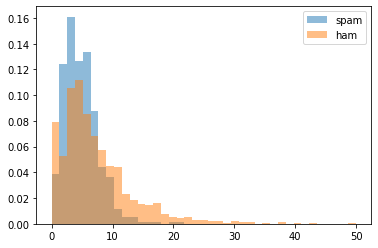

In [ ]:
import numpy as np
bins = np.linspace(0,50,40)
plt.hist(df[df['label']=='spam']['count_punct'],bins,density=True,alpha=0.5,label='spam')
plt.hist(df[df['label']=='ham']['count_punct'],bins,density=True,alpha=0.5,label='ham')
plt.legend()
plt.show()

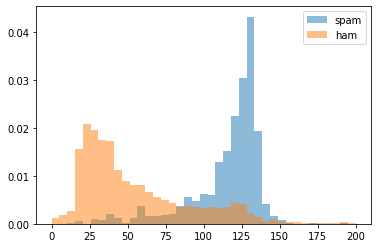

In [ ]:
import numpy as np
bins = np.linspace(0,200,40)
plt.hist(df[df['label']=='spam']['body_len'],bins,alpha=0.5,density=True,label='spam')
plt.hist(df[df['label']=='ham']['body_len'],bins,alpha=0.5,density=True,label='ham')
plt.legend()
plt.show()

***From the above histogram of body length between spam and non-spam is cleary represent that spam message have greater length than non-spam ***

**So we can use body length as a feature**

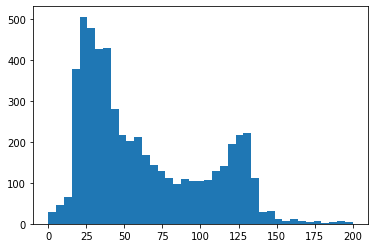

In [ ]:
bins = np.linspace(0,200,40)
plt.hist(df['body_len'],bins,label='spam')
plt.show()


# there are two spikes in the distribution called bimodel distribution
# Also it is not heavily skewed so tranformation is not necessary

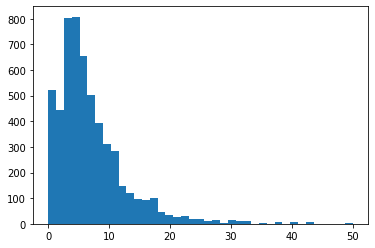

In [ ]:
bins = np.linspace(0,50,40)
plt.hist(df['count_punct'],bins,label='spam')
plt.show()

# it is heavily skewed so we will transform it

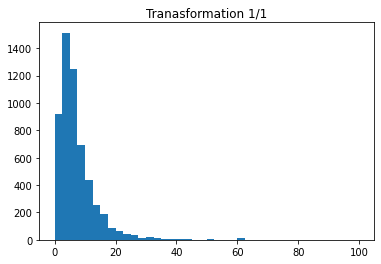

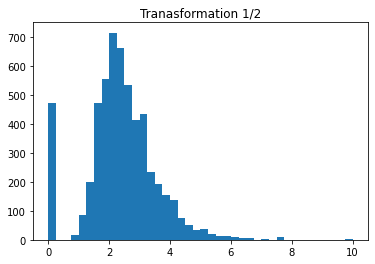

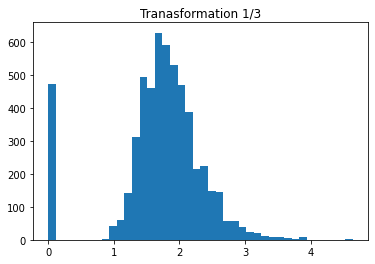

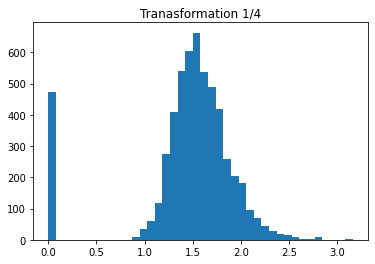

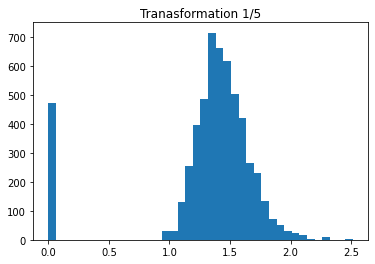

In [ ]:
# we will use box-cox tranformation technique

#we will use 1,2,3,4 positive values becuase it work for above distribtuion
for i in [1,2,3,4,5]:
  plt.hist((df['count_punct'])**(1/i),bins=40,label='spam')
  plt.title('Tranasformation 1/{}'.format(str(i)))
  plt.show()

# Machine Learning algorithm to classify spam or non spam message

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
data = pd.read_csv('/content/SMSSpamCollection.tsv', sep='\t')
data.columns=['label','body_text']
def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round((count/(len(text)-text.count(' '))),3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
def clean_text(text):
  text = ''.join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text
tfdif_vect = TfidfVectorizer(analyzer=clean_text)
x_tfdif = tfdif_vect.fit_transform(data['body_text'])
x_features = pd.concat([data['body_len'], data['punct%'],pd.DataFrame(x_tfdif.toarray())], axis=1)

In [ ]:
x_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train , y_test = train_test_split(x_features, data['label'], test_size = 0.2)

In [ ]:
def train_RF(n_test, depth):
  rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
  rf_model = rf.fit(x_train,y_train)
  y_pred = rf_model.predict(x_test)
  precision, recall, f_score , support = score(y_test , y_pred, pos_label='spam', average = 'binary')
  print('Est: {}/Depth :{} --------- Precision:{} / Recall: {} / Accuracy : {}'.format(n_est, depth, round(precision,3), round(recall,3),round((y_pred==y_test).sum()/len(y_pred),3)))

In [ ]:
for n_est in [10,150,300]:
  for depth in [10,20,30,None]:
    train_RF(n_est, depth)

Est: 10/Depth :10 --------- Precision:1.0 / Recall: 0.289 / Accuracy : 0.899
Est: 10/Depth :20 --------- Precision:1.0 / Recall: 0.585 / Accuracy : 0.941
Est: 10/Depth :30 --------- Precision:0.992 / Recall: 0.742 / Accuracy : 0.962
Est: 10/Depth :None --------- Precision:0.992 / Recall: 0.805 / Accuracy : 0.971
Est: 150/Depth :10 --------- Precision:1.0 / Recall: 0.277 / Accuracy : 0.897
Est: 150/Depth :20 --------- Precision:1.0 / Recall: 0.579 / Accuracy : 0.94
Est: 150/Depth :30 --------- Precision:1.0 / Recall: 0.736 / Accuracy : 0.962
Est: 150/Depth :None --------- Precision:1.0 / Recall: 0.836 / Accuracy : 0.977
Est: 300/Depth :10 --------- Precision:1.0 / Recall: 0.245 / Accuracy : 0.892
Est: 300/Depth :20 --------- Precision:1.0 / Recall: 0.585 / Accuracy : 0.941
Est: 300/Depth :30 --------- Precision:1.0 / Recall: 0.755 / Accuracy : 0.965
Est: 300/Depth :None --------- Precision:1.0 / Recall: 0.836 / Accuracy : 0.977
